#**Tutorial 2: Research Project Implementation**

> Indented block

> Indented block




**Week 1, Day 1, Good Research Practices**

**Content creators:** Marguerite Brown, Yuxin Zhou

**Content reviewers:** TBD

**Content editors:** TBD

**Production editors:** TBD

**Our 2023 Sponsors:** TBD

###**Code and Data Sources**

Code for this tutorial is based on TBD

Data from the following sources are used in this tutorial:






#**Tutorial Objectives**

In this tutorial, you will learn about the research process. This includes how to

5.   Draft analyses of data to test a hypothesis
6.   Implement analysis of data
7.   Interpret results in the context of existing knowledge
8.   Communicate your results and conclusions

By the end of this tutorial you will be able to:

*   Understand the principles of good research practices
*   Learn to view a scientific data set or question through the lens of equity: Who is represented by this data and who is not? Who has access to this information? Who is in a position to use it?

### Demos

In [1]:
#Imports

# Import only the libraries/objects that you use in this tutorial. 

# If any external library has to be installed, !pip install library --quiet
# follow this order: numpy>matplotlib. 
# import widgets in hidden Figure settings cell

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import interpolate
import statsmodels.api as sm

#**Step 5: Drafting the Analysis**



In [ ]:
# @title Video 6: Drafting the Analysis 
#Tech team will add code to format and display the video

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


###**Coding Exercise 1.1: fitting a linear regression model**

To explore the relationship between CO<sub>2</sub> and temperature, we may want to make a scatter plot of the two variables, where the x-axis represents CO<sub>2</sub> and the y-axis represents temperature. Then we can see if a linear regression model fits the scatter well.

Before we do that, let's try our hands at making a scatter plot on randomly generated data points and fitting them through the linear regression model!

In [3]:
# set up a random number generator
rng = np.random.default_rng()
# x is one hundred random numbers between 0 and 1
x = rng.random(100)
# y is one hundred random numbers according to the relationship y = 1.6x + 0.5
y = 1.6*x + rng.random(100)

#################################################
## TODO for students: write a line of code to make a scatter plot of x and y ##
#################################################



#%% regression
x = sm.add_constant(x)  # let's add an intercept (b in y=mx+b) to our model
mod = sm.OLS(y, x)    # ordinary least sqaure
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model

#################################################
## TODO for students: write a line of code to plot the calculated regression line
#################################################


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     252.9
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           6.76e-29
Time:                        18:12:50   Log-Likelihood:                -12.099
No. Observations:                 100   AIC:                             28.20
Df Residuals:                      98   BIC:                             33.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5311      0.054      9.802      0.0

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     226.0
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           3.42e-27
Time:                        18:12:55   Log-Likelihood:                -25.768
No. Observations:                 100   AIC:                             55.54
Df Residuals:                      98   BIC:                             60.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5463      0.062      8.744      0.0

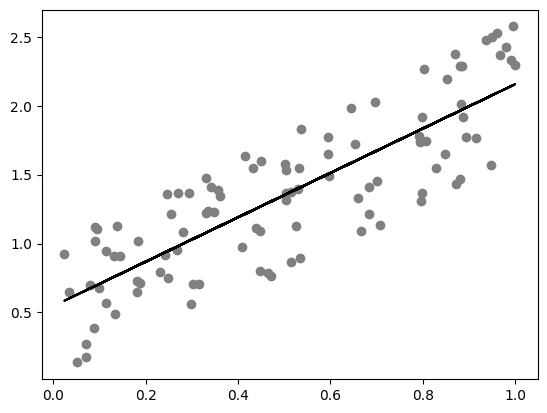

In [4]:
# to_remove solution
# set up a random number generator
rng = np.random.default_rng()
# x is one hundred random numbers between 0 and 1
x = rng.random(100)
# y is one hundred random numbers according to the relationship y = 1.6x + 0.5
y = 1.6*x + rng.random(100)

#%% plot
plt.scatter(x, y, color='gray')

#%% regression
x = sm.add_constant(x)  # let's add an intercept (b in y=mx+b) to our model
mod = sm.OLS(y, x)    # ordinary least sqaure
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model
plt.plot(x, x*res.params[1]+res.params[0], color='k')


Now that we know how to write codes to analysze the linear relationship between two variables, we're ready to move on to real world data!

#**Step 6: Implementing the Analysis**

##**Activity: Implement the Analysis**

Over the next 45 minutes, you will be implementing a linear regression model as outlined in Step 5 on real-world CO<sub>2</sub> and temperature records.

The CO<sub>2</sub> and temperature records we will be analyzing are both examples of paleoclimate data (for more information, refer back to Step 3). The CO<sub>2</sub> record (Bereiter et al., 2015) was generated by measureing the CO<sub>2</sub> concentration in ancient air bubbles trapped inside ice from multiple ice cores retrieved from Antarctica. The temperature record (Shakun et al., 2015) is based on chemical analysis done on the shells of planktic foraminifera. The foraminifera shells were identified and picked from deep-sea sediments, and the temperature record combined multiple sea-surface temperature records from a range of sites globally.

Why are we focusing on these two records specifically? The CO<sub>2</sub> record from Antarctic ice core is the gold standard of air CO<sub>2</sub> variabilility on glacial-interglacial time scales, and it has a temporal resolution unmatched by any other reconstruction methods. The temperature record comes from sediment cores all over the global ocean, and therefore is likely representative of the global surface ocean temperature variability. Polar air temperature records are also available from ice core studies, but such records may represent an exaggerated view of the global temperature because of polar amplification.

If you would like to learn more, the data sources are:

CO<sub>2</sub>: Bereiter, B., Eggleston, S., Schmitt, J., Nehrbass-Ahles, C., Stocker, T.F., Fischer, H., Kipfstuhl, S., Chappellaz, J., 2015. Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present. Geophysical Research Letters 42, 542–549. https://doi.org/10.1002/2014GL061957

Temperature: Shakun, J.D., Lea, D.W., Lisiecki, L.E., Raymo, M.E., 2015. An 800-kyr record of global surface ocean δ18O and implications for ice volume-temperature coupling. Earth and Planetary Science Letters 426, 58–68. https://doi.org/10.1016/j.epsl.2015.05.042

As a first step, let's plot the two records on their respective age scale. An incomplete code is included below. Modify the code as necessary and run the analysis.



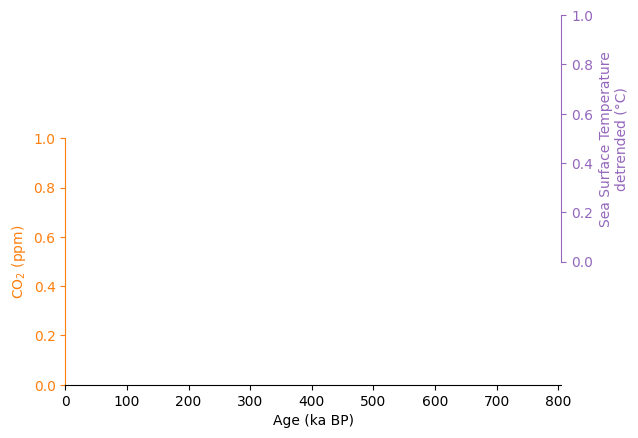

In [5]:
# This code block will plot the CO2 and temperature data as two
# time series

# read SST data
SST = pd.read_table('/content/drive/Shareddrives/Academy/Courses/Climate/Climatematch/02-Curriculum/Climatematch Content Folder/W2D2 - Projects Day /Shakun2015_SST.txt')
SST.set_index('Age', inplace=True)

# read CO2 data
CO2 = pd.read_table('/content/drive/Shareddrives/Academy/Courses/Climate/Climatematch/02-Curriculum/Climatematch Content Folder/W2D2 - Projects Day /antarctica2015co2composite_cleaned.txt')
CO2.set_index('age_gas_calBP', inplace=True)

#%% plot
# set up two subplots in a grid of 2 rows and 1 column
# also make sure the two plots share the same x(time) axis
fig, axes = plt.subplots(2, 1, sharex=True)
# move the two subplots closer to each other
fig.subplots_adjust(hspace=-0.5)
#################################################
## TODO for students: plot the CO2 with the first panel (axes[0])
## and plot the temperature data with the second panel (axes[1])
#################################################

#%% beautification
# since sharex=True in plt.subplots(), this sets the x axis limit for both panels
axes[1].set_xlim((0, 805))
# axis labels
axes[1].set_xlabel('Age (ka BP)')
axes[0].set_ylabel(r'Sea Surface Temperature'
                   '\n'
                   'detrended (°C)',
                   color='C4')
axes[1].set_ylabel(r'CO${}_\mathrm{2}$ (ppm)',
                   color='C1')
# despine makes the plots look cleaner
sns.despine(ax=axes[0], top=True, right=False, bottom=True, left=True)
sns.despine(ax=axes[1], top=True, right=True, bottom=False, left=False)
# clean up top panel x axis ticks
axes[0].xaxis.set_ticks_position('none')
# move top panel xlabel to the right side
axes[0].yaxis.set_label_position('right')
# the following code ensures the subplots don't overlap
for ax in axes:
    ax.set_zorder(10)
    ax.set_facecolor('none')
# color the axis
axes[0].spines['right'].set_color('C4')
axes[1].spines['left'].set_color('C1')
axes[0].tick_params(axis='y', colors='C4')
axes[1].tick_params(axis='y', colors='C1')

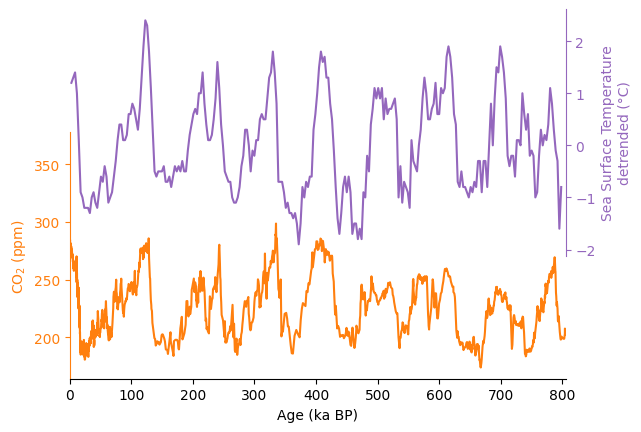

In [6]:
# to_remove solution
# This code block will plot the CO2 and temperature data as two
# time series
# read SST data
SST = pd.read_table('/content/drive/Shareddrives/Academy/Courses/Climate/Climatematch/02-Curriculum/Climatematch Content Folder/W2D2 - Projects Day /Shakun2015_SST.txt')
SST.set_index('Age', inplace=True)

# read CO2 data
CO2 = pd.read_table('/content/drive/Shareddrives/Academy/Courses/Climate/Climatematch/02-Curriculum/Climatematch Content Folder/W2D2 - Projects Day /antarctica2015co2composite_cleaned.txt')
CO2.set_index('age_gas_calBP', inplace=True)

#%% plot
# set up two subplots in a grid of 2 rows and 1 column
# also make sure the two plots share the same x(time) axis
fig, axes = plt.subplots(2, 1, sharex=True)
# move the two subplots closer to each other
fig.subplots_adjust(hspace=-0.5)
axes[0].plot(SST.index, SST['SST stack'], color='C4')
axes[1].plot(CO2.index/1000, CO2['co2_ppm'], color='C1')

#%% beautification
# since sharex=True in plt.subplots(), this sets the x axis limit for both panels
axes[1].set_xlim((0, 805))
# axis labels
axes[1].set_xlabel('Age (ka BP)')
axes[0].set_ylabel(r'Sea Surface Temperature'
                   '\n'
                   'detrended (°C)',
                   color='C4')
axes[1].set_ylabel(r'CO${}_\mathrm{2}$ (ppm)',
                   color='C1')
# despine makes the plots look cleaner
sns.despine(ax=axes[0], top=True, right=False, bottom=True, left=True)
sns.despine(ax=axes[1], top=True, right=True, bottom=False, left=False)
# clean up top panel x axis ticks
axes[0].xaxis.set_ticks_position('none')
# move top panel xlabel to the right side
axes[0].yaxis.set_label_position('right')
# the following code ensures the subplots don't overlap
for ax in axes:
    ax.set_zorder(10)
    ax.set_facecolor('none')
# color the axis
axes[0].spines['right'].set_color('C4')
axes[1].spines['left'].set_color('C1')
axes[0].tick_params(axis='y', colors='C4')
axes[1].tick_params(axis='y', colors='C1')

Now that we've taken a look at the two time series, let's make a scatter plot between them and fit a linear regression model through the data.

In [7]:
# In this code block, we will make a scatter plot of CO2 and temperature
# and fit a linear regression model through the data

def age_model_interp(CO2_age, CO2, SST_age):
  '''
  This helper function linearly interpolates CO2 data, which
  have a very high temporal resolution, to temperature data,
  which have a relatively low resolution
  '''
  f = interpolate.interp1d(CO2_age, CO2, fill_value='extrapolate')
  all_ages = f(SST_age)
  return all_ages

# read SST data
SST = pd.read_table('/content/drive/Shareddrives/Academy/Courses/Climate/Climatematch/02-Curriculum/Climatematch Content Folder/W2D2 - Projects Day /Shakun2015_SST.txt')
SST.set_index('Age', inplace=True)

# read CO2 data
CO2 = pd.read_table('/content/drive/Shareddrives/Academy/Courses/Climate/Climatematch/02-Curriculum/Climatematch Content Folder/W2D2 - Projects Day /antarctica2015co2composite_cleaned.txt')
CO2.set_index('age_gas_calBP', inplace=True)

# interpolate CO2 data to SST age. Fill in the input parameters.
CO2_interpolated = age_model_interp(..., ..., ...)

#%% plot
# set up two subplots in a grid of 2 rows and 1 column
# also make sure the two plots share the same x(time) axis
fig, ax = plt.subplots(1, 1, sharex=True)

# Fill in the input parameters to make a scatter plot where the x-axis is CO2
# and the y-axis is temperature
ax.scatter(..., ..., color='gray')

#################################################
## TODO for students: Refer back to Coding Exercise 1.1
## And fit the CO2 and temperature data through a linear regression model
## and then plot the model on top of the scatter data
#################################################

#%% beautification
# axis labels
ax.set_xlabel(r'CO${}_\mathrm{2}$ (ppm)')
ax.set_ylabel(r'Sea Surface Temperature'
                    '\n'
                    'detrended (°C)')


TypeError: ignored

                            OLS Regression Results                            
Dep. Variable:              SST stack   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     317.7
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           3.37e-47
Time:                        18:14:35   Log-Likelihood:                -249.84
No. Observations:                 266   AIC:                             503.7
Df Residuals:                     264   BIC:                             510.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.0556      0.342    -17.715      0.0

Text(0, 0.5, 'Sea Surface Temperature\ndetrended (°C)')

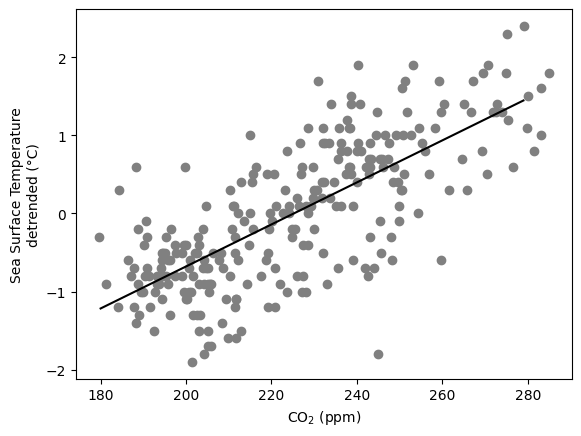

In [8]:
# to_remove solution
# In this code block, we will make a scatter plot of CO2 and temperature
# and fit a linear regression model through the data

def age_model_interp(CO2_age, CO2, SST_age):
  '''
  This helper function linearly interpolates CO2 data, which
  have a very high temporal resolution, to temperature data,
  which have a relatively low resolution
  '''
  f = interpolate.interp1d(CO2_age, CO2, fill_value='extrapolate')
  all_ages = f(SST_age)
  return all_ages

# read SST data
SST = pd.read_table('/content/drive/Shareddrives/Academy/Courses/Climate/Climatematch/02-Curriculum/Climatematch Content Folder/W2D2 - Projects Day /Shakun2015_SST.txt')
SST.set_index('Age', inplace=True)

# read CO2 data
CO2 = pd.read_table('/content/drive/Shareddrives/Academy/Courses/Climate/Climatematch/02-Curriculum/Climatematch Content Folder/W2D2 - Projects Day /antarctica2015co2composite_cleaned.txt')
CO2.set_index('age_gas_calBP', inplace=True)

# interpolate CO2 data to SST age
CO2_interpolated = age_model_interp(CO2.index/1000, CO2['co2_ppm'], SST.index)

#%% plot
# set up two subplots in a grid of 2 rows and 1 column
# also make sure the two plots share the same x(time) axis
fig, ax = plt.subplots(1, 1, sharex=True)

ax.scatter(CO2_interpolated, SST['SST stack'], color='gray')

#%% regression
X = CO2_interpolated
X = sm.add_constant(X)  # let's add an intercept (beta_0) to our model
y = SST['SST stack']
mod = sm.OLS(y, X)    # ordinary least sqaure
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model
x_fit = np.arange(180, 280)
y_fit = x_fit * res.params[1] + res.params[0]  # ordinary least square
ax.plot(x_fit, y_fit, color='k')

#%% beautification
# axis labels
ax.set_xlabel(r'CO${}_\mathrm{2}$ (ppm)')
ax.set_ylabel(r'Sea Surface Temperature'
                    '\n'
                    'detrended (°C)')


**Figure making through the equity lense**
<details>
<summary>Click here for some information</summary>
Are the colors in your figure distinguishable for people with color-vision deficiencies?

More readings on this topic:

Contrast checker: https://color.adobe.com/create/color-contrast-analyzer&sa=D&source=editors&ust=1681780909587373&usg=AOvVaw1x42nZz5OhbL5KZYJc89Gs

Coloring for color blindness: https://davidmathlogic.com/colorblind

Python-specific color palettes that are friendly to those with color-vision deficiency: https://seaborn.pydata.org/tutorial/color_palettes.html

#**Step 7: Interpreting the Results**



In [ ]:
# @title Video 1: Interpreting the Results
#Tech team will add code to format and display the video

**Quantifying the uncertainty**
<details>
<summary>Click here for some information</summary>
Look up "linear regression model R squared" and how it measures the uncertainty of a linear regression model. In the "OLS Regression Results" printout, can you find where R-squared is? What does it say about how confident you can be about a linear relationship bewteen CO<sub>2</sub> and temperature?

##**Activity: Interpreting the Results through the lens of equity**
For the next 10 minutes, discuss what the results capture well in terms of the relationship between CO<sub>2</sub> and tempearture. Who is represented by this data, specifically the compiled temperature record, and who is not? Who generated these data? Who has access to this information? Who is in a position to use it?

**Further readings**
<details>
<summary>Click here for more readings on Interpreting the Results through the lens of equity</summary>

Donovan, R. (2023), Climate journalism needs voices from the Global South, Eos, 104, https://doi.org/10.1029/2023EO230085

Tandon, A. (2021), Analysis: The lack of diversity in climate-science research, Carbon Brief, https://www.carbonbrief.org/analysis-the-lack-of-diversity-in-climate-science-research/

#**Step 8: Communicating Your Conclusions**



In [ ]:
# @title Video 1: Communicating Your Conclusions 
#Tech team will add code to format and display the video

##**Activity: Communicating Your Conclusions**

For the next 20 minutes, break out into groups of 2 or 3 and pick one presentation format and discuss:

*   Who is the target audience of this format?
*   What information is important to include?

After this, come back together as a whole pod and discuss everyone's suggestions.


**Equity in the Science Publishing**
<details>
<summary>Click here for some information about equity and publishing</summary>

There are aspects of our current research culture that perpetuate inequity in the publishing process. Academic institutions and funding agencies often place importance on publishing in peer-reviewed journals. However, they have some drawbacks, including

*    Accessibility
<ul><li>Papers in these journals are often kept behind a paywall, making them less accessible to people without the backing of either a university or a company.</li>
<li>More and more journals offer the option of publishing open access, but at expense to the submitting authors: fees can often exceed 1000 USD.</li>
<li>
If you want to ensure accessibility, consider also releasing your results in other formats as well. For instance,
<ul><li>Blog posts</li>
<li>Podcasts</li>
<li>Social media posts</li>
<li>Conferences</li> </ul>
<li>If you know that your research contains results that are relevant to specific populations, it is valuable to find ways to communicate your results to them.</li></ul>
*    Peer Review as Gatekeeping
<ul><li>At its best, the peer review process enforces scientific rigor.</li>
<li>At its worst, it can become a tool for enforcing pre-existing norms, including the biases of its reviewers.</li>
<li>REMEMBER: Bad experiences with reviewers and rejections does not mean that your research is bad. There are papers which went on to win Nobel prizes that experienced resistance and rejection during the peer review process BECAUSE they were introducing important new ideas.</li>
<li>Further Reading:</li>
<ul><li>Campanario, J. M. (2009). Rejecting and resisting Nobel class discoveries: Accounts by Nobel Laureates. Scientometrics, 81(2), 549–565.</li>
<li>Bancroft, S. F., Ryoo, K., & Miles, M. (2022). Promoting equity in the peer review process of journal publication. Science Education, 106, 1232– 1248.  https://doi.org/10.1002/sce.21733</li></ul> </ul>

#**Summary**

In this tutorial, we worked through how to analyze and present research.

*   We learned how to draft an analysis (Step 5)
*   We implemented the analysis that we drafted (Step 6)
*   We learned how to interpret the results of the analysis (Step 7)
*   We learned about how to communicate the conclusions of our research (Step 8)


#**Suggested Further Reading**